<a href="https://colab.research.google.com/github/KmouBR/EDA-BookingDemand/blob/main/EDA_BookingDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Esse EDA tem como princípio fundamental explorar dois tipos de análise:

- Análise Descritiva
- Análise Diagnóstica

# Colunas em Sequência traduzidas
1 - hotel
2 - cancelado
3 - prazo de entrega
4 - ano_data_chegada
5 - mês_data_chegada
6 - número_da_semana_data_chegada
7 - dia_do_mês_data_chegada
8 - estadias_em_noites_de_fim_de_semana
9 - estadias_em_noites_de_semana
10 - adultos
11 - crianças
12 - bebês
13 - refeição
14 - país
15 - segmento_de_mercado
16 - canal_de_distribuição
17 - hóspede_repetido
18 - cancelamentos_anteriores
19 - reservas_anteriores_não_canceladas
20 - tipo_de_quarto_reservado
21 - tipo_de_quarto_atribuído
22 - alterações_de_reserva
23 - tipo_depósito
24 - agente
25 - empresa
26 - lista_de_dias_em_espera
27 - tipo_de_cliente
28 - endereço
29 - vagas_de_estacionamento_necessárias
30 - total_de_solicitações_especiais
31 - status_da_reserva
32 - data_do_status_da_reserva

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('hotel_bookings.csv')

In [4]:
pd.set_option('display.max_columns', None)
data.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
data["children"] = data["children"].fillna(data["children"].mode()[0])

data["country"] = data["country"].fillna(data["country"].mode()[0])

data["agent"]=data["agent"].fillna(data["agent"].mean())

In [8]:
data = data.drop('company', axis=1)

In [9]:
data.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [10]:
distribuicao = data['hotel'].value_counts(normalize = True)
print(distribuicao)

hotel
City Hotel      0.664461
Resort Hotel    0.335539
Name: proportion, dtype: float64


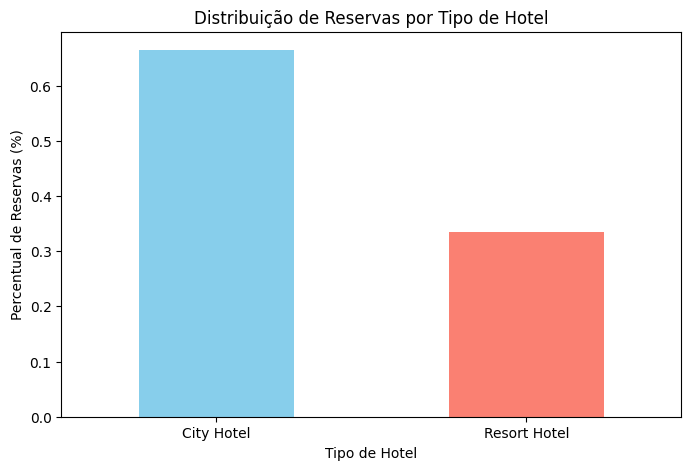

In [11]:
plt.figure(figsize=(8, 5))
distribuicao.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Distribuição de Reservas por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Percentual de Reservas (%)')
plt.xticks(rotation=0)
plt.show()

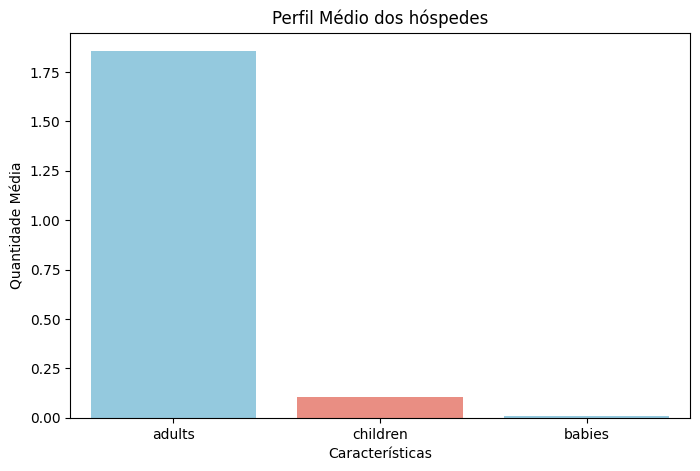

In [12]:
median_perfil = data[['adults', 'children', 'babies']].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=median_perfil.index, y=median_perfil.values, palette=['skyblue', 'salmon'])
plt.xticks(rotation=0)
plt.title('Perfil Médio dos hóspedes')
plt.xlabel('Características')
plt.ylabel('Quantidade Média')
plt.show()

In [13]:
data.groupby('hotel')[['adults', 'children', 'babies']].mean().T

hotel,City Hotel,Resort Hotel
adults,1.850977,1.867149
children,0.091365,0.128682
babies,0.004941,0.013904


In [14]:
media_criancas = data.groupby('hotel')[['children']].mean().T
media_criancas

hotel,City Hotel,Resort Hotel
children,0.091365,0.128682


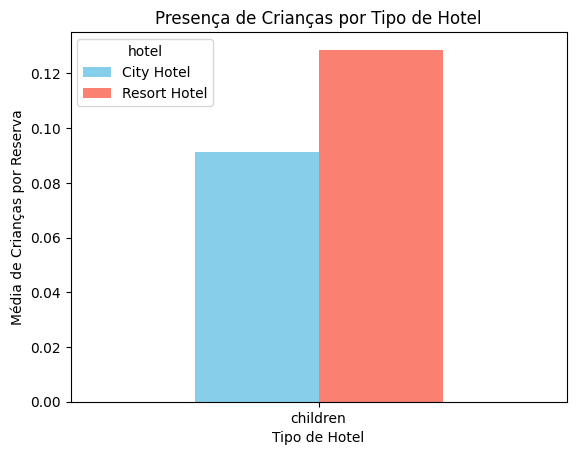

In [15]:
media_criancas.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Média de Crianças por Reserva')
plt.xlabel('Tipo de Hotel')
plt.title('Presença de Crianças por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

In [16]:
data['total_noites'] = data['stays_in_weekend_nights'] + data ['stays_in_week_nights']

In [17]:
media_noites = data.groupby('hotel')['total_noites'].mean().T
print(media_noites)

data['hotel'].value_counts(normalize=True).mul(100).round(2)

hotel
City Hotel      2.978142
Resort Hotel    4.318547
Name: total_noites, dtype: float64


,proportion
hotel,
City Hotel,66.45
Resort Hotel,33.55


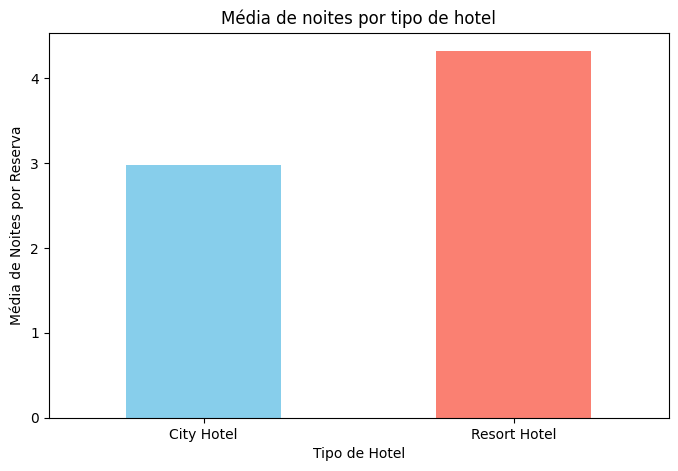

In [18]:
plt.figure(figsize=(8,5))
media_noites.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Média de Noites por Reserva')
plt.xlabel('Tipo de Hotel')
plt.title('Média de noites por tipo de hotel')
plt.xticks(rotation=0)
plt.show()

In [19]:
city = data[data['hotel'] == 'City Hotel']['total_noites']
resort = data[data['hotel'] == 'Resort Hotel']['total_noites']
t_stat, p_val = ttest_ind(city, resort, equal_var=False)
print(f"p-value: {p_val}")

p-value: 0.0


In [20]:
cancelamentos = data.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False) * 100

print(cancelamentos)

customer_type
Transient          40.746320
Contract           30.961727
Transient-Party    25.429868
Group              10.225303
Name: is_canceled, dtype: float64


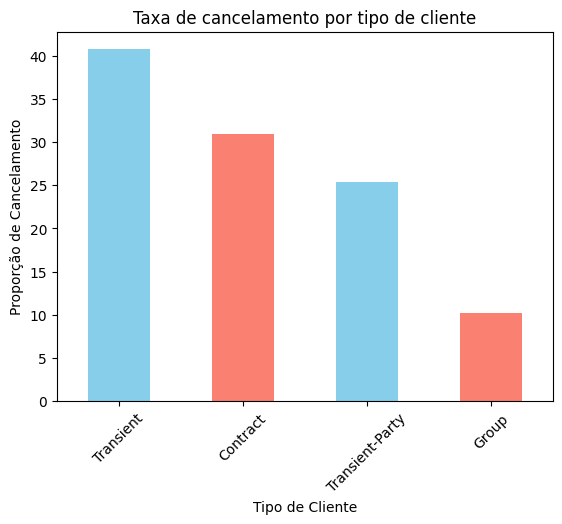

In [21]:
cancelamentos.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Taxa de cancelamento por tipo de cliente')
plt.ylabel('Proporção de Cancelamento')
plt.xlabel('Tipo de Cliente')
plt.xticks(rotation=45)
plt.show()

In [22]:
data['lead_time_group'] = pd.cut(data['lead_time'], bins=[0, 30, 90, 180, 365, data['lead_time'].max()],
                               labels=['0-30d', '31-90d', '91-180d', '181-365d', '365+d'])
lead_cancel = data.groupby('lead_time_group')['is_canceled'].mean().sort_values(ascending=True) * 100

print(lead_cancel)

lead_time_group
0-30d       20.873891
31-90d      37.698372
91-180d     44.710466
181-365d    55.453955
365+d       67.662008
Name: is_canceled, dtype: float64


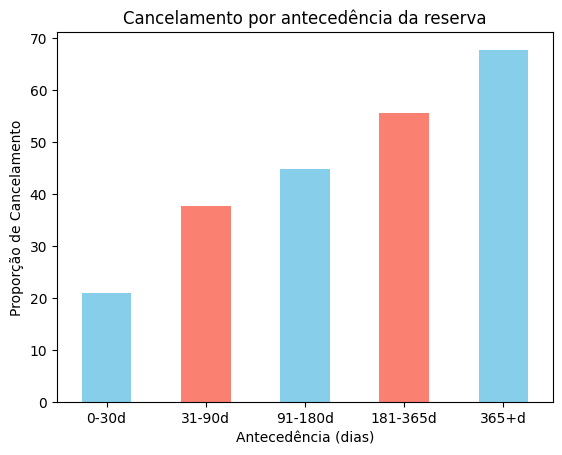

In [23]:
lead_cancel.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Cancelamento por antecedência da reserva')
plt.ylabel('Proporção de Cancelamento')
plt.xlabel('Antecedência (dias)')
plt.xticks(rotation=0)
plt.show()

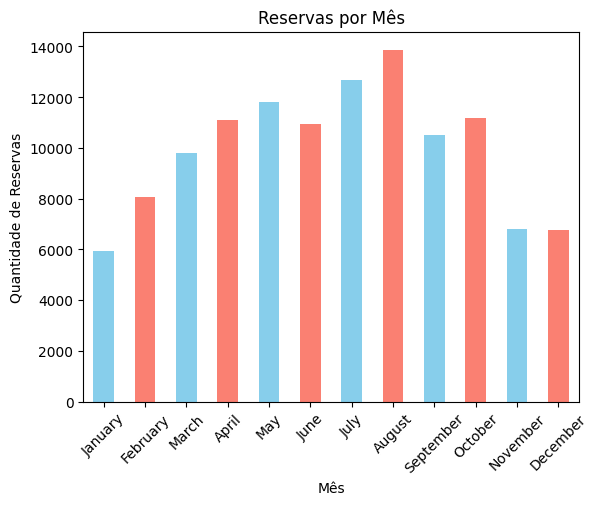

In [24]:
reservas_mes = data['arrival_date_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

reservas_mes.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(rotation=45)
plt.title('Reservas por Mês')
plt.ylabel('Quantidade de Reservas')
plt.xlabel('Mês')
plt.show()

In [25]:
data['country'].value_counts(normalize=True).head(10) * 100

,proportion
country,
PRT,41.107295
GBR,10.159142
FRA,8.723511
ESP,7.176480
DEU,6.103526
ITA,3.154368
IRL,2.826870
BEL,1.961638
BRA,1.862803


In [26]:
canais = data['distribution_channel'].value_counts(normalize=True) * 100
print(canais)

distribution_channel
TA/TO        81.975040
Direct       12.266521
Corporate     5.592596
GDS           0.161655
Undefined     0.004188
Name: proportion, dtype: float64


In [27]:
cancelamento_pcanal = data.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False) * 100

print(cancelamento_pcanal)

distribution_channel
Undefined    80.000000
TA/TO        41.025851
Corporate    22.075783
GDS          19.170984
Direct       17.459884
Name: is_canceled, dtype: float64


In [31]:
repetentes = data['is_repeated_guest'].value_counts(normalize=True) * 100
print(repetentes)

is_repeated_guest
0    96.808778
1     3.191222
Name: proportion, dtype: float64
